In [1]:
#Importing Necessary Libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Data
df = pd.read_csv("Zomato data .csv")

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
#Inspecting the data
# df.head()
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
#Changing names for some columns
changed_name = {
    "listed_in(type)" : "type",
    "approx_cost(for two people)" : "cost"
}
df.rename(columns = changed_name, inplace = True)
df

,name,online_order,book_table,rate,votes,cost,type
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [6]:
#Changing Data type for the "type" column
df["type"] = df["type"].astype("category")
df["type"].dtype

CategoricalDtype(categories=['Buffet', 'Cafes', 'Dining', 'other'], ordered=False, categories_dtype=object)

In [7]:
#Changing the rating column to numerical values
df["rate"] = df["rate"].apply(lambda rating : float(rating.split("/")[0]))

In [8]:
#Dropping Unecessary columns
cols = ["book_table"]
df.drop(cols, axis = 1, inplace = True)

In [9]:
#Checking for duplicates entries
print(df.duplicated().sum())

0


In [10]:
#Checking for null values
df.isna().sum()

name            0
online_order    0
rate            0
votes           0
cost            0
type            0
dtype: int64

#### What Type of resturant majority of customers order from

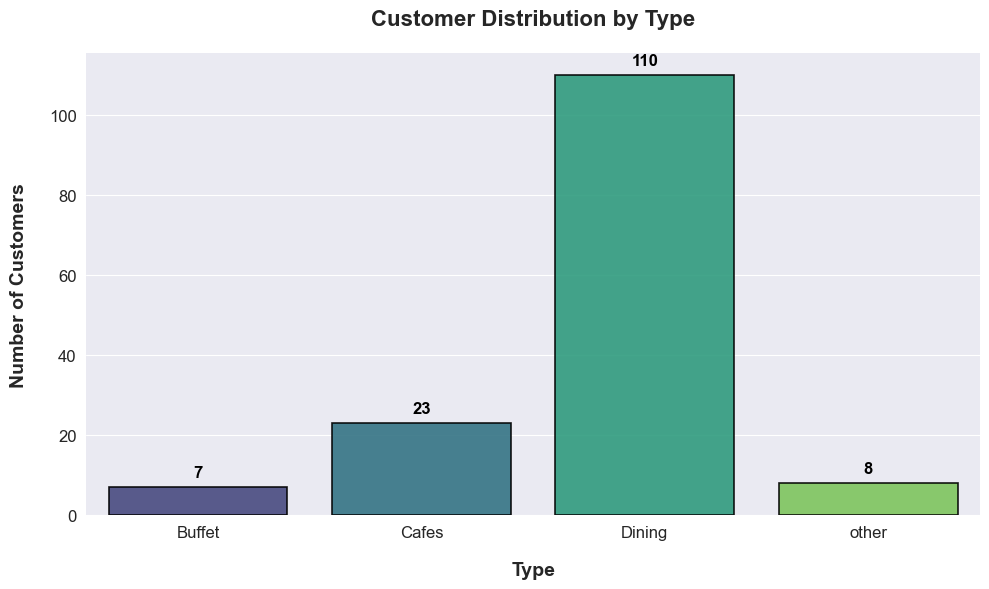

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=df,
    x="type",
    palette="viridis",      
    saturation=0.8,         
    edgecolor="black",      
    linewidth=1.2,          
    alpha=0.9,
    hue = "type"
)


plt.xlabel("Type", fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel("Number of Customers", fontsize=14, fontweight='bold', labelpad=15)
plt.title("Customer Distribution by Type", fontsize=16, fontweight='bold', pad=20)

for container in ax.containers:
    ax.bar_label(container, 
                fmt='%d', 
                fontsize=12, 
                fontweight='bold',
                padding=5,
                color='black')

plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### How Many Votes Each Type of Resturant Recevied From the Customers

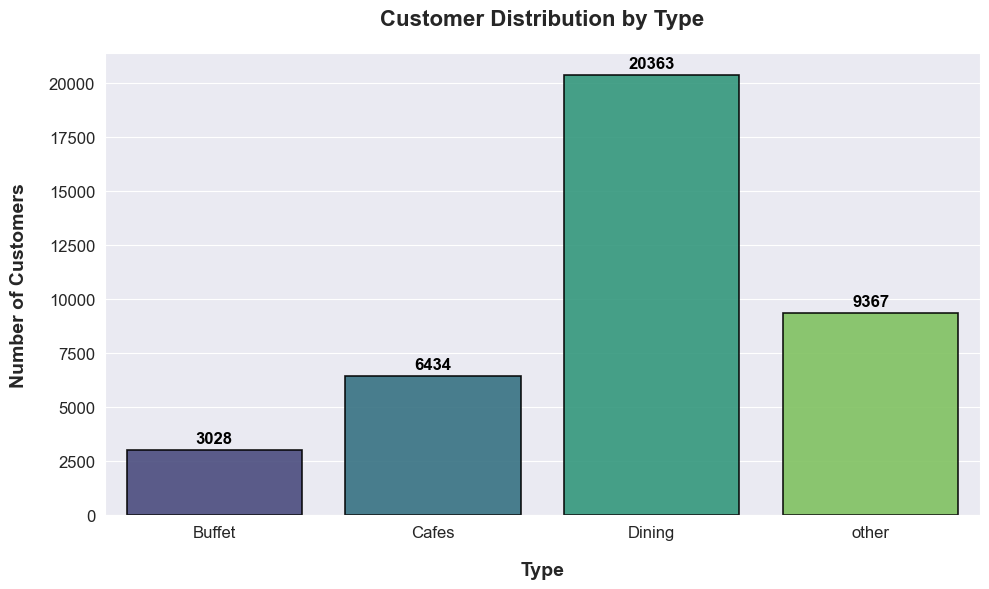

In [61]:
votings_df = df.groupby("type", observed = True)["votes"].sum().reset_index()
plt.figure(figsize = (10, 6))

barplot = sns.barplot(
    data = votings_df,
    x = "type",
    y = "votes",
    hue = "type",
    palette="viridis",
    edgecolor="black",      
    linewidth=1.2,          
    alpha=0.9,
    legend = False
)

for bar in barplot.containers:
    barplot.bar_label(
        bar,
        fmt = "%d",
        fontsize = 12,
        fontweight = "bold",
        padding = 3,
        color = "black"
    )

plt.xlabel("Type", fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel("Number of Customers", fontsize=14, fontweight='bold', labelpad=15)
plt.title("Customer Distribution by Type", fontsize=16, fontweight='bold', pad=20)

plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

plt.tight_layout()

## What are the ratings that majority of the resturants recevied?

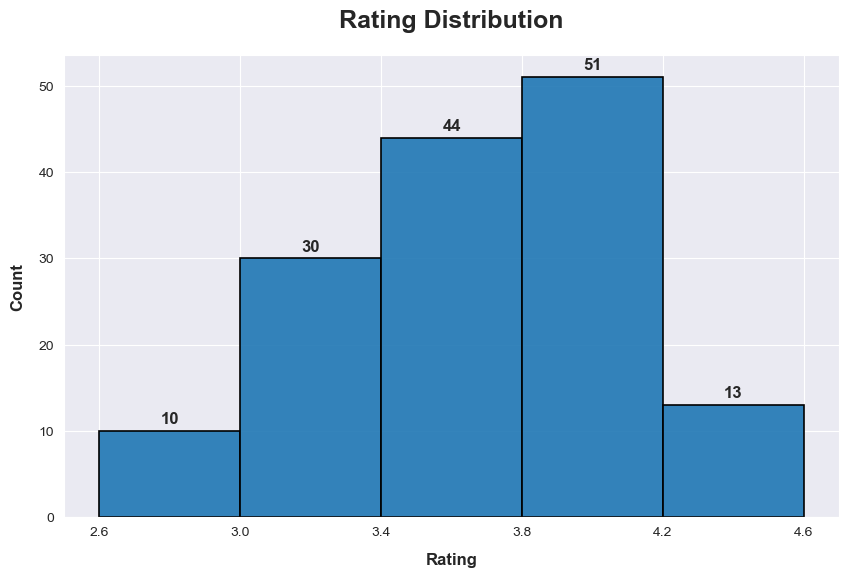

In [44]:
sns.set_style("dark")
states = df['rate'].describe()
plt.figure(figsize = (10, 6))
x = np.linspace(states['min'], states['max'], 6)

histplot = sns.histplot(
    data = df,
    x = "rate",
    bins = 5,
    edgecolor="black",
    linewidth=1.2,          
    alpha=0.9,
    legend = False
)

for patch in histplot.patches:
    height = patch.get_height()
    if height > 0:
        histplot.text(
            patch.get_x() + patch.get_width() / 2., 
            height + 0.5,
            f'{int(height)}', 
            ha='center', 
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

plt.grid(True)
plt.xticks(x)
plt.title("Rating Distribution", fontsize = 18, fontweight = "bold", pad = 20)
plt.xlabel("Rating", fontsize = 12, fontweight = "bold", labelpad = 10)
plt.ylabel("Count", fontsize = 12, fontweight = "bold", labelpad = 10)
plt.show()

## Average Spending On Each Order

In [51]:
sns.set_style("darkgrid")

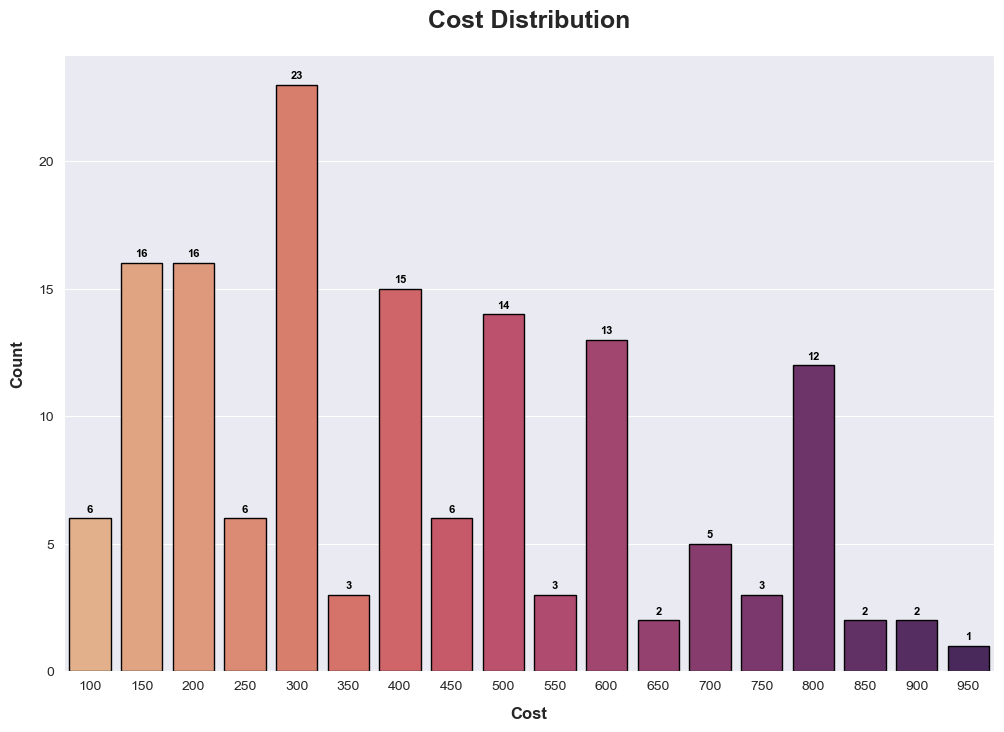

In [65]:
plt.figure(figsize = (12, 8))

count_plot = sns.countplot(
    data = df,
    x = "cost",
    edgecolor = "black",
    palette = "flare",
    hue = "cost",
    saturation = 0.8,
    legend = False
)

for container in count_plot.containers:
    count_plot.bar_label(container, 
                fmt='%d', 
                fontsize=8, 
                fontweight='bold',
                padding=3,
                color='black')

plt.title("Cost Distribution", fontsize = 18, fontweight = "bold", pad = 20)
plt.xlabel("Cost", fontsize = 12, fontweight = "bold", labelpad = 10)
plt.ylabel("Count", fontsize = 12, fontweight = "bold", labelpad = 10)
plt.show()

## Which Mode Recevies Most Rating

In [63]:
df.head()

,name,online_order,rate,votes,cost,type
0,Jalsa,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,4.1,787,800,Buffet
2,San Churro Cafe,Yes,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,3.7,88,300,Buffet
4,Grand Village,No,3.8,166,600,Buffet


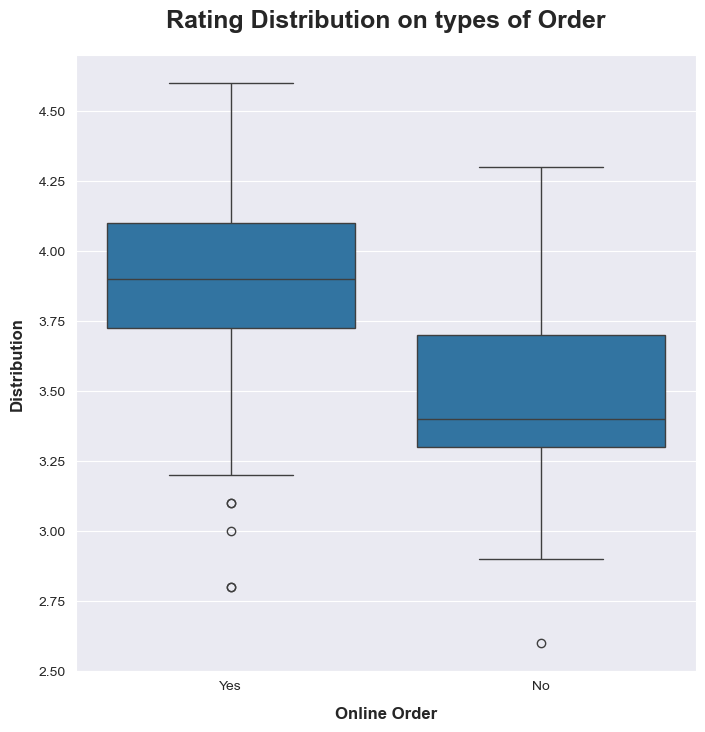

In [66]:
plt.figure(figsize = (8, 8))

sns.boxplot(
    data = df,
    x = "online_order",
    y = "rate"
)

plt.title("Rating Distribution on types of Order", fontsize = 18, fontweight = "bold", pad = 20)
plt.xlabel("Online Order", fontsize = 12, fontweight = "bold", labelpad = 10)
plt.ylabel("Distribution", fontsize = 12, fontweight = "bold", labelpad = 10)
plt.show()

## Which Type Resturant Recevied More Offline Order

In [67]:
df.head()

,name,online_order,rate,votes,cost,type
0,Jalsa,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,4.1,787,800,Buffet
2,San Churro Cafe,Yes,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,3.7,88,300,Buffet
4,Grand Village,No,3.8,166,600,Buffet


C:\Users\user\AppData\Local\Temp\ipykernel_37244\2595656516.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index = "type", columns = "online_order", aggfunc = "size", fill_value = 0)


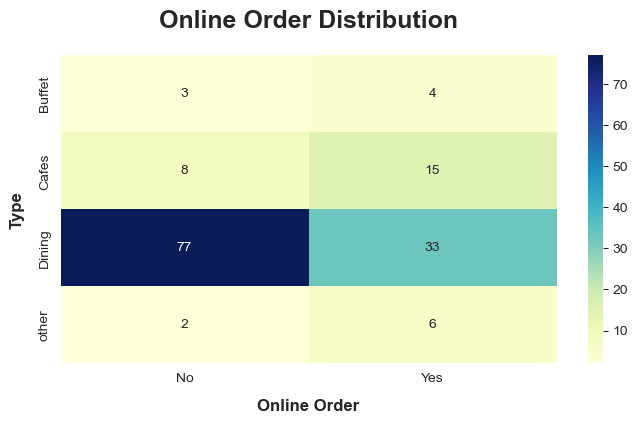

In [73]:
pivot_table = df.pivot_table(index = "type", columns = "online_order", aggfunc = "size", fill_value = 0)
plt.figure(figsize = (8, 4))

sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Online Order Distribution", fontsize = 18, fontweight = "bold", pad = 20)
plt.xlabel("Online Order", fontsize = 12, fontweight = "bold", labelpad = 10)
plt.ylabel("Type", fontsize = 12, fontweight = "bold", labelpad = 10)
plt.show()